In [1]:
import pandas as pd
import numpy as np
import requests as rq

In [2]:
import piplite
await piplite.install('seaborn')

In [3]:
r=rq.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv')
with open('auto.csv','w') as f:
    f.write(r.text)

/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [4]:
df=pd.read_csv('auto.csv')
df.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
df.tail(10)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
194,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
195,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
196,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
197,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
198,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
203,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [7]:
df.columns=headers

In [8]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [9]:
df1=df.replace('?',np.nan)
df1.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [10]:
df=df1.dropna(subset=['price'],axis=0)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [11]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [12]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [13]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,200.000000,164,200,200,200,198,200,200,200,200.000000,...,200.000000,200,196,196,200.000000,198,198,200.000000,200.000000,200
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,58,22,NaN,NaN,185
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,16500
freq,NaN,11,32,180,164,113,94,118,197,NaN,...,NaN,91,23,19,NaN,19,36,NaN,NaN,2
mean,0.830000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.848000,...,126.860000,NaN,NaN,NaN,10.170100,NaN,NaN,25.200000,30.705000,NaN
std,1.248557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.038261,...,41.650501,NaN,NaN,NaN,4.014163,NaN,NaN,6.432487,6.827227,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.750000,NaN,NaN,NaN,8.575000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,119.500000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,142.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [14]:
missing=df.isnull()
missing.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
for c in missing.columns.tolist():
    print(c)
    print(missing[c].value_counts())
    print('')

symboling
False    200
Name: symboling, dtype: int64

normalized-losses
False    164
True      36
Name: normalized-losses, dtype: int64

make
False    200
Name: make, dtype: int64

fuel-type
False    200
Name: fuel-type, dtype: int64

aspiration
False    200
Name: aspiration, dtype: int64

num-of-doors
False    198
True       2
Name: num-of-doors, dtype: int64

body-style
False    200
Name: body-style, dtype: int64

drive-wheels
False    200
Name: drive-wheels, dtype: int64

engine-location
False    200
Name: engine-location, dtype: int64

wheel-base
False    200
Name: wheel-base, dtype: int64

length
False    200
Name: length, dtype: int64

width
False    200
Name: width, dtype: int64

height
False    200
Name: height, dtype: int64

curb-weight
False    200
Name: curb-weight, dtype: int64

engine-type
False    200
Name: engine-type, dtype: int64

num-of-cylinders
False    200
Name: num-of-cylinders, dtype: int64

engine-size
False    200
Name: engine-size, dtype: int64

fuel-system
Fa

In [16]:
avg_n=df['normalized-losses'].astype('float').mean(axis=0)

In [17]:
df['normalized-losses'].replace(np.nan,avg_n,inplace=True)

<ipython-input-17-00bbbc54da51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized-losses'].replace(np.nan,avg_n,inplace=True)


In [18]:
df['normalized-losses'].isnull().sum()

0

In [19]:
avg_s=df['stroke'].astype(float).mean()

In [20]:
df['stroke'].replace(np.nan,avg_s,inplace=True)

<ipython-input-20-88e8935796fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stroke'].replace(np.nan,avg_s,inplace=True)


In [21]:
df['stroke'].isnull().sum()

0

In [22]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

<ipython-input-22-4429c30e6fc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)


In [23]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)

In [24]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

<ipython-input-24-397e1f287409>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)


In [25]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [26]:
df['num-of-doors'].replace(np.nan,'four',inplace=True)

<ipython-input-26-d40d5c7ee598>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num-of-doors'].replace(np.nan,'four',inplace=True)


In [27]:
df.dropna(subset=['price'],inplace=True,axis=0)

<ipython-input-27-55eaa23256bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['price'],inplace=True,axis=0)


In [28]:
df.reset_index(drop=True,inplace=True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
9,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


In [29]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [30]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype(float)
df[["normalized-losses"]] = df[["normalized-losses"]].astype(int)
df[["price"]] = df[["price"]].astype(float)
df[["peak-rpm"]] = df[["peak-rpm"]].astype(float)

<ipython-input-30-4f3ef143169e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bore", "stroke"]] = df[["bore", "stroke"]].astype(float)
<ipython-input-30-4f3ef143169e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["normalized-losses"]] = df[["normalized-losses"]].astype(int)
<ipython-input-30-4f3ef143169e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [31]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [32]:

df['city-L/100km']=235/df['city-mpg']

df.head()

<ipython-input-32-a8d051010e75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city-L/100km']=235/df['city-mpg']


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421


In [33]:
df['length']=df['length']/df['length'].max()

<ipython-input-33-98962a4f8c49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length']=df['length']/df['length'].max()


In [34]:
df['width']=(df['width']-df['width'].mean())/df['width'].std()

<ipython-input-34-06aae17070ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['width']=(df['width']-df['width'].mean())/df['width'].std()


In [35]:
df['horsepower']=df['horsepower'].astype(int)

<ipython-input-35-c1b78870ed9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower']=df['horsepower'].astype(int)


In [36]:
bins=np.linspace(df['horsepower'].min(),df['horsepower'].max(),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [37]:
group_n=['Low','medium','high']

In [38]:
df['horsepower-binned']=pd.cut(df['horsepower'],bins,labels=group_n,include_lowest=True)

<ipython-input-38-1ec367cfd29d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower-binned']=pd.cut(df['horsepower'],bins,labels=group_n,include_lowest=True)


In [39]:
df[['horsepower','horsepower-binned']].head(5)

,horsepower,horsepower-binned
0,111,Low
1,154,medium
2,102,Low
3,115,Low
4,110,Low


In [40]:
df["horsepower-binned"].value_counts()

Low       152
medium     43
high        5
Name: horsepower-binned, dtype: int64

In [41]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'horsepower bins')

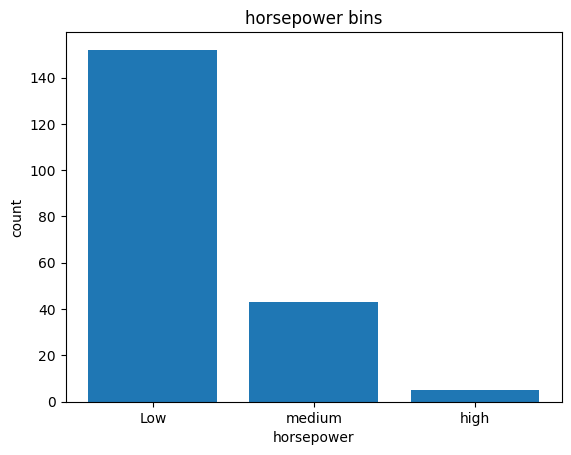

In [42]:
plt.bar(group_n,df["horsepower-binned"].value_counts())
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

Text(0.5, 1.0, 'horsepower bins')

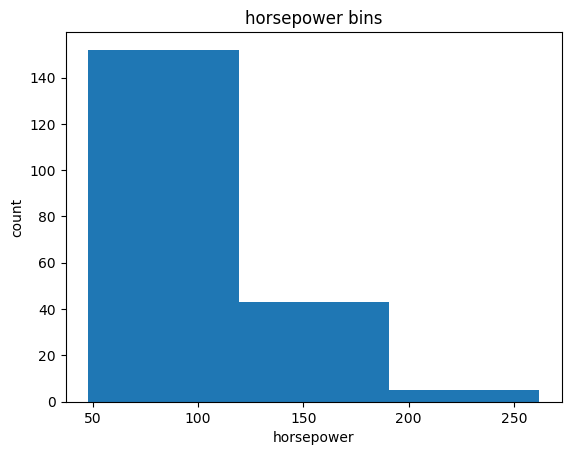

In [43]:
plt.hist(df["horsepower"], bins = 3)


plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [44]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [45]:
fuel=pd.get_dummies(df['fuel-type'])
fuel.head(5)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [46]:
fuel.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'},inplace=True)

In [47]:
fuel.head(5)

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [48]:
df=pd.concat([df,fuel],axis=1)

In [49]:
df.drop('fuel-type',axis=1,inplace=True)

In [50]:
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,Low,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,medium,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950.0,9.791667,Low,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450.0,13.055556,Low,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110,5500.0,19,25,15250.0,12.368421,Low,0,1


In [51]:
df.corr()

<ipython-input-51-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.150400,0.008244,-0.181073,0.074581,0.284011,-0.030158,0.041248,-0.083327,0.062423,-0.195381,0.195381
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.030103,0.055759,-0.114738,0.217323,0.239580,-0.225255,-0.182011,0.133999,0.238712,-0.101574,0.101574
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.503319,0.144675,0.249689,0.375732,-0.364971,-0.480029,-0.552211,0.589147,0.484047,0.306706,-0.306706
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.611943,0.120888,0.159203,0.580477,-0.286754,-0.667658,-0.700186,0.691044,0.659174,0.210616,-0.210616
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548528,0.182855,0.189008,0.617032,-0.247388,-0.638155,-0.684700,0.752795,0.677111,0.243448,-0.243448
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.193809,-0.081273,0.259526,-0.085725,-0.315756,-0.057087,-0.111568,0.137284,0.008923,0.281198,-0.281198
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.645109,0.168642,0.156444,0.758095,-0.279411,-0.750390,-0.795515,0.834420,0.785868,0.221082,-0.221082
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.583127,0.208004,0.029005,0.822656,-0.256702,-0.651002,-0.679877,0.872337,0.745337,0.070925,-0.070925
bore,-0.150400,-0.030103,0.503319,0.611943,0.548528,0.193809,0.645109,0.583127,1.000000,-0.051087,0.002021,0.567729,-0.276793,-0.591963,-0.598624,0.543713,0.569647,0.055434,-0.055434
stroke,0.008244,0.055759,0.144675,0.120888,0.182855,-0.081273,0.168642,0.208004,-0.051087,1.000000,0.186761,0.100351,-0.066173,-0.040677,-0.040282,0.083296,0.041470,0.240013,-0.240013


In [52]:
df[['bore', 'stroke', 'compression-ratio',  'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.051087,0.002021,0.567729
stroke,-0.051087,1.000000,0.186761,0.100351
compression-ratio,0.002021,0.186761,1.000000,-0.214162
horsepower,0.567729,0.100351,-0.214162,1.000000


<AxesSubplot:xlabel='engine-size', ylabel='price'>

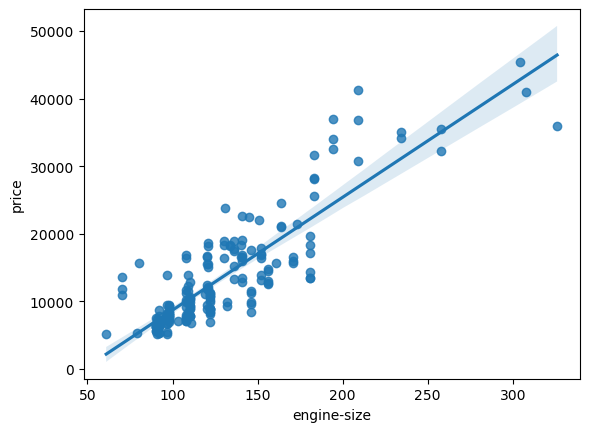

In [53]:
import seaborn as sns
sns.regplot(x=df['engine-size'],y=df['price'],data=df)


In [54]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872337
price,0.872337,1.000000


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

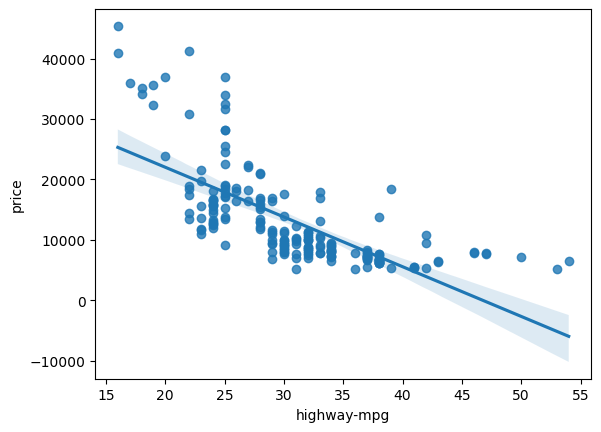

In [55]:
sns.regplot(x=df['highway-mpg'],y=df['price'],data=df)

In [56]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.705115
price,-0.705115,1.000000


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

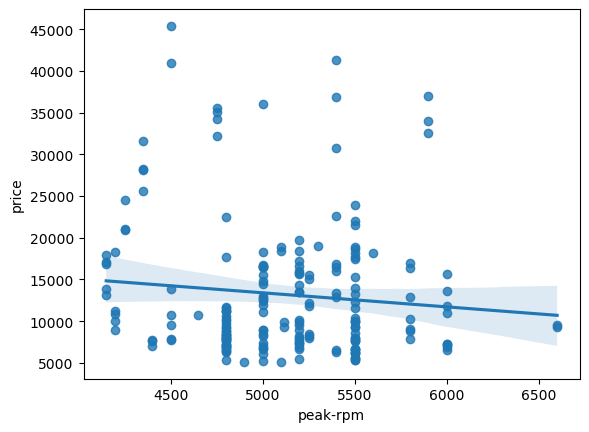

In [57]:
sns.regplot(x=df['peak-rpm'],y=df['price'],data=df)

In [58]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101519
price,-0.101519,1.000000


In [59]:
df.head(2)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,Low,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,medium,0,1


<AxesSubplot:xlabel='body-style', ylabel='price'>

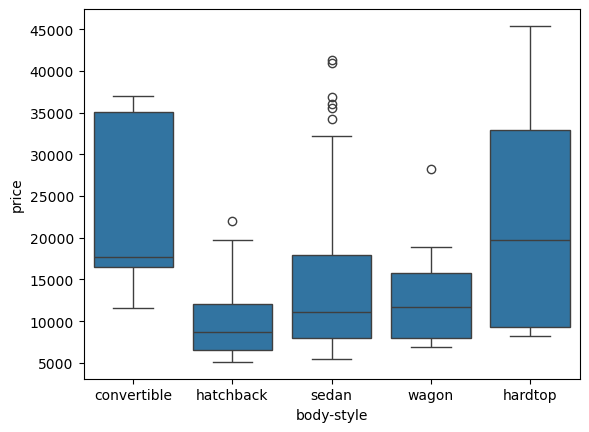

In [60]:
sns.boxplot(x='body-style',y='price',data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

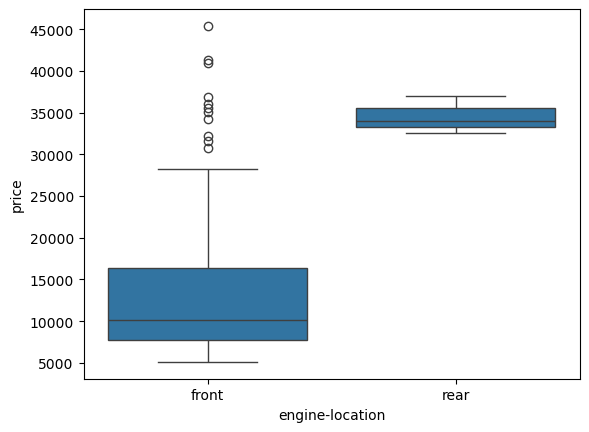

In [61]:
sns.boxplot(x='engine-location',y='price',data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

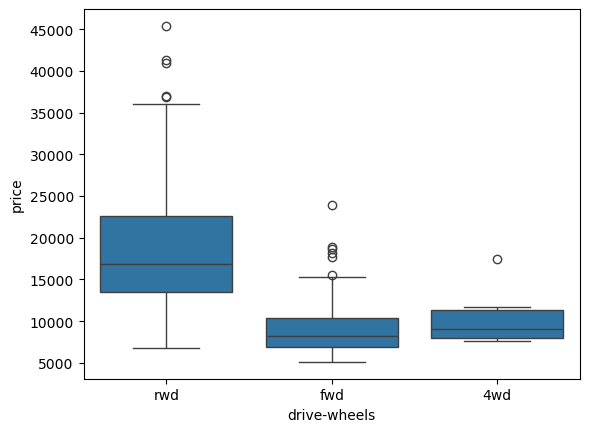

In [62]:
sns.boxplot(x='drive-wheels',y='price',data=df)

In [63]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,196.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,0.837232,2.282619e-15,53.791500,2555.705000,126.860000,3.330000,3.259847,10.170100,103.355000,5118.181818,25.200000,30.705000,13205.690000,9.937914,0.100000,0.900000
std,1.248557,32.076542,6.038261,0.059333,1.000000e+00,2.428449,518.594552,41.650501,0.271303,0.314177,4.014163,37.455487,479.240110,6.432487,6.827227,7966.982558,2.539415,0.300753,0.300753
min,-2.000000,65.000000,86.600000,0.678039,-2.662033e+00,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,100.250000,94.500000,0.800937,-8.193430e-01,52.000000,2163.000000,97.750000,3.150000,3.117500,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.000000,97.000000,0.832292,-1.892620e-01,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5159.090909,24.000000,30.000000,10270.000000,9.791667,0.000000,1.000000
75%,2.000000,138.250000,102.400000,0.881788,3.694890e-01,55.525000,2928.250000,142.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.750000,12.368421,0.000000,1.000000
max,3.000000,256.000000,120.900000,1.000000,2.901701e+00,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [64]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,200,200,200,200,200,200,200,200,200
unique,22,2,2,5,3,2,6,7,8
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,164,115,94,118,197,145,156,91


In [65]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,74
4wd,8


In [66]:
drives=df['drive-wheels'].value_counts().to_frame()
drives.index.name='drive'
drives.rename(columns={'drive-wheels':'counts'},inplace=True)
drives

,counts
drive,
fwd,118
rwd,74
4wd,8


In [67]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [68]:
group = df[['drive-wheels','body-style','price']]

In [69]:
g=group.groupby(['drive-wheels','body-style'],as_index=False).mean()
g

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [70]:
group_p=g.pivot(index='drive-wheels',columns='body-style')
group_p

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [71]:
group_p=group_p.fillna(0)

In [72]:
group_p

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                 0.00      0.000000   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

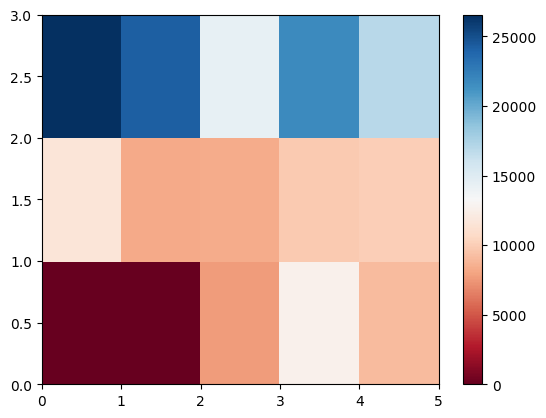

In [73]:
import matplotlib.pyplot as plt
plt.pcolor(group_p,cmap='RdBu')
plt.colorbar()

In [74]:
df.corr()

<ipython-input-74-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.150400,0.008244,-0.181073,0.074581,0.284011,-0.030158,0.041248,-0.083327,0.062423,-0.195381,0.195381
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.030103,0.055759,-0.114738,0.217323,0.239580,-0.225255,-0.182011,0.133999,0.238712,-0.101574,0.101574
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.503319,0.144675,0.249689,0.375732,-0.364971,-0.480029,-0.552211,0.589147,0.484047,0.306706,-0.306706
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.611943,0.120888,0.159203,0.580477,-0.286754,-0.667658,-0.700186,0.691044,0.659174,0.210616,-0.210616
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548528,0.182855,0.189008,0.617032,-0.247388,-0.638155,-0.684700,0.752795,0.677111,0.243448,-0.243448
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.193809,-0.081273,0.259526,-0.085725,-0.315756,-0.057087,-0.111568,0.137284,0.008923,0.281198,-0.281198
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.645109,0.168642,0.156444,0.758095,-0.279411,-0.750390,-0.795515,0.834420,0.785868,0.221082,-0.221082
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.583127,0.208004,0.029005,0.822656,-0.256702,-0.651002,-0.679877,0.872337,0.745337,0.070925,-0.070925
bore,-0.150400,-0.030103,0.503319,0.611943,0.548528,0.193809,0.645109,0.583127,1.000000,-0.051087,0.002021,0.567729,-0.276793,-0.591963,-0.598624,0.543713,0.569647,0.055434,-0.055434
stroke,0.008244,0.055759,0.144675,0.120888,0.182855,-0.081273,0.168642,0.208004,-0.051087,1.000000,0.186761,0.100351,-0.066173,-0.040677,-0.040282,0.083296,0.041470,0.240013,-0.240013


In [75]:
from scipy import stats

In [76]:
pearson_coef,p_value=stats.pearsonr(df['wheel-base'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5891470005448699  with a P-value of P = 4.4570195020504547e-20


<AxesSubplot:xlabel='wheel-base', ylabel='price'>

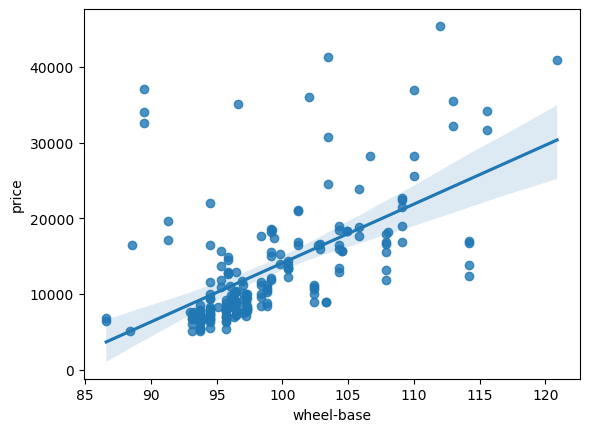

In [77]:
sns.regplot(x='wheel-base',y='price',data=df)

In [78]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.8097789763551083  with a P-value of P =  9.88737925128025e-48


<AxesSubplot:xlabel='horsepower', ylabel='price'>

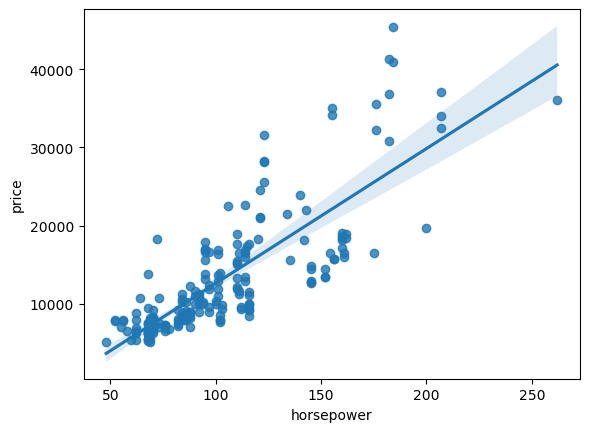

In [79]:
sns.regplot(x='horsepower',y='price',data=df)

In [80]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.6910440897821907  with a P-value of P =  9.960963222347278e-30


<AxesSubplot:xlabel='length', ylabel='price'>

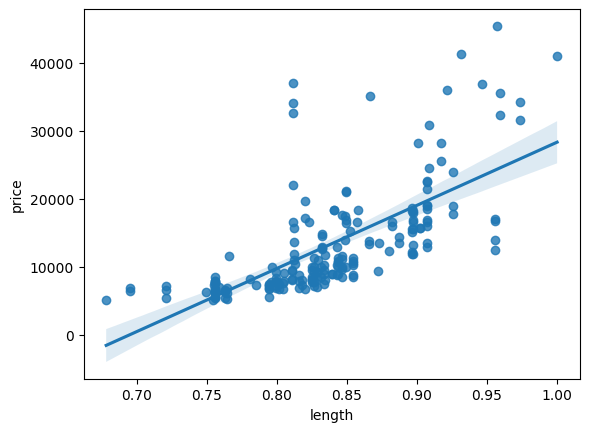

In [81]:
sns.regplot(x='length',y='price',data=df)

In [82]:
person_coef,p_value=stats.pearsonr(df['width'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.6910440897821907  with a P-value of P =  8.256714148306669e-38


In [83]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344204348498462  with a P-value of P =  3.9699775360218195e-53


In [84]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723367498521148  with a P-value of P = 1.8977171466553092e-63


In [85]:
df['bore']=df['bore'].fillna(df['bore'].mean())

In [86]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5434310033088079  with a P-value of P =   9.209749630850313e-17


In [87]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6871861020862694  with a P-value of P =  2.729256568478667e-29


In [88]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7051147088046406  with a P-value of P =  2.1973260531581965e-31


In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lm =LinearRegression()
lm.fit(df[['highway-mpg']],df['price'])
print(lm.coef_)
print(lm.intercept_)

[-822.82843203]
38470.63700549667


In [91]:
yhat=lm.predict(df[['highway-mpg']])
yhat[0:5]

array([16254.26934067, 17077.0977727 , 13785.78404458, 20368.41150083,
       17899.92620473])

In [92]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [93]:
lm.fit(z,df['price'])
print(lm.coef_)
print(lm.intercept_)

[53.64350321  4.70621169 81.46397065 36.26760488]
-15814.439139011325


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

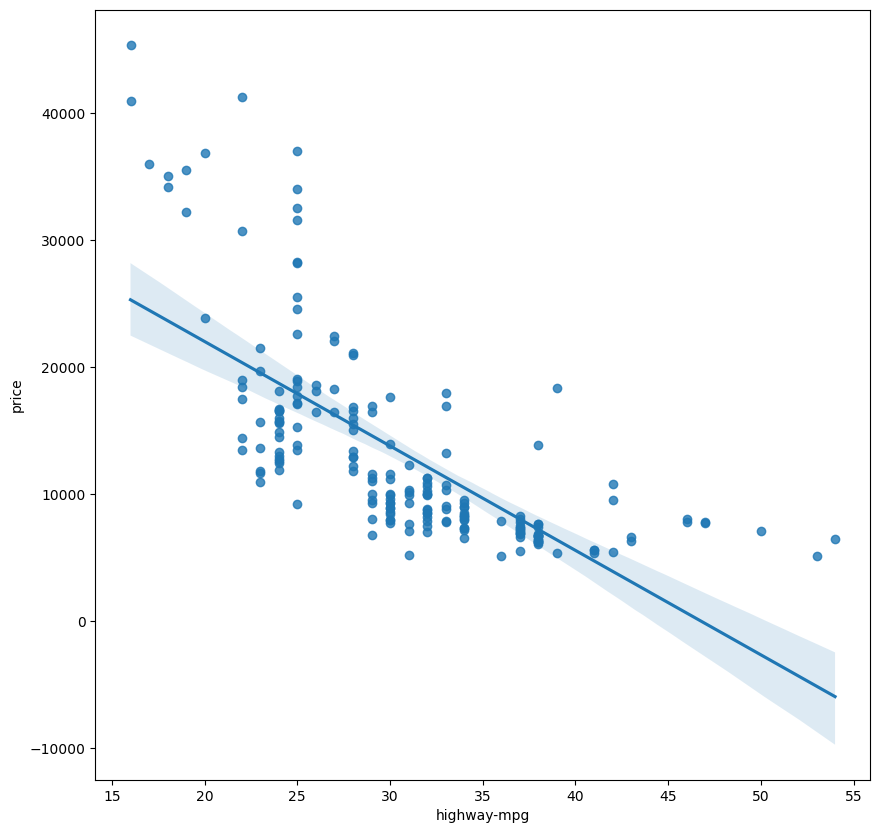

In [94]:
plt.figure(figsize=(10,10))
sns.regplot(x=df['highway-mpg'],y=df['price'],data=df)

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

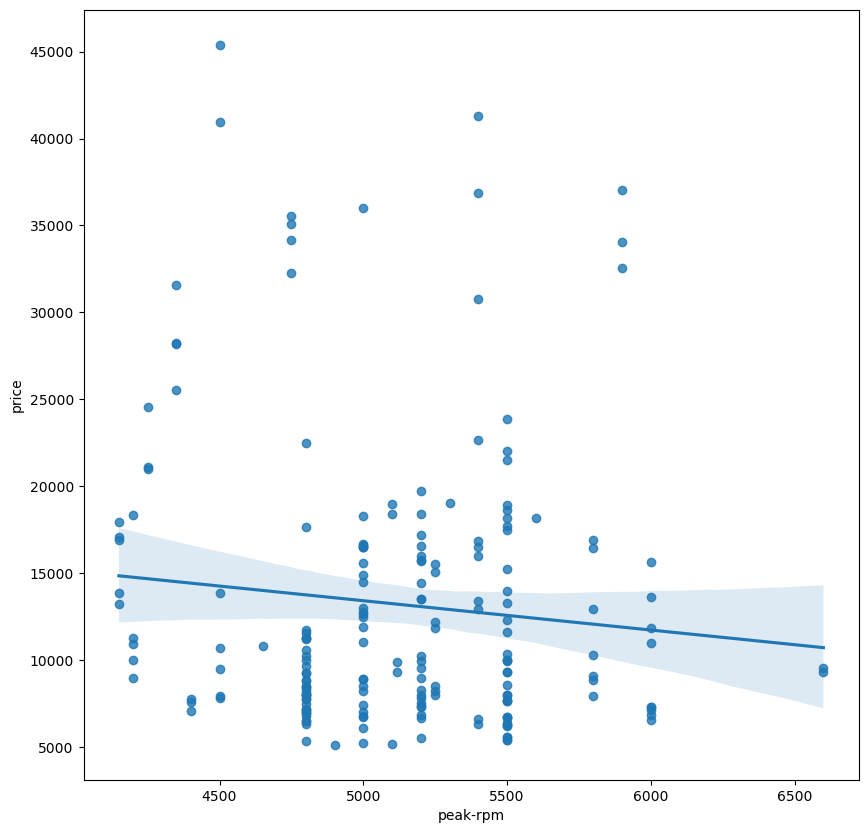

In [95]:
plt.figure(figsize=(10, 10))
sns.regplot(x="peak-rpm", y="price", data=df)

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

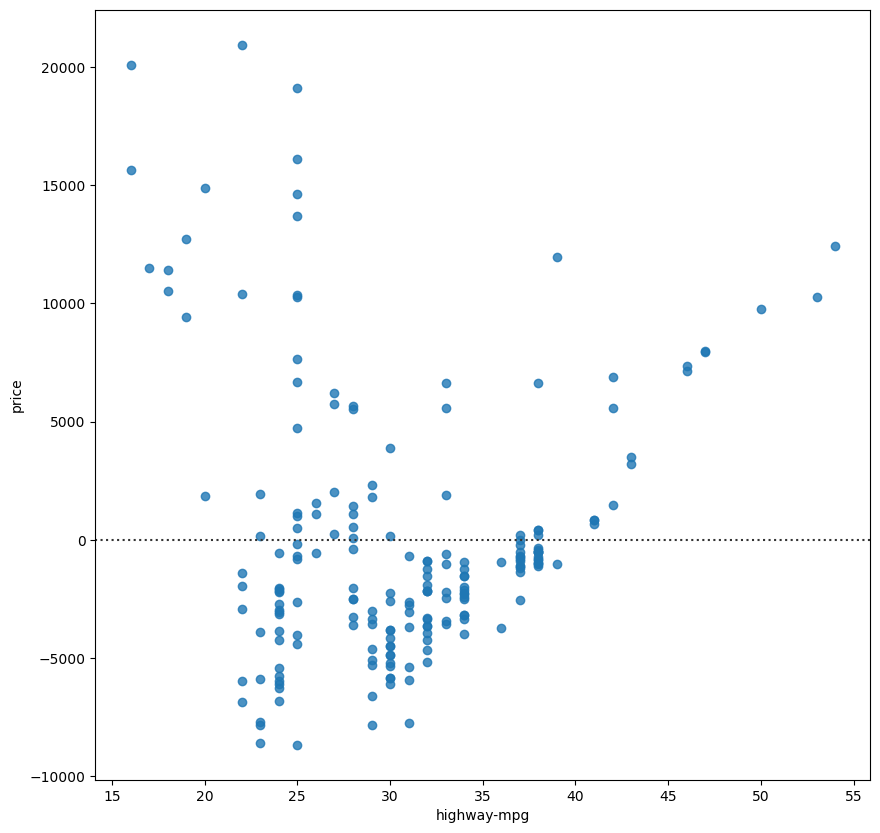

In [96]:
plt.figure(figsize=(10,10))
sns.residplot(x=df[['highway-mpg']],y=df['price'],data=df)


In [97]:
yhat=lm.predict(z)

<ipython-input-98-df69cdef4950>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(df['price'],color='r',hist=False,label='actual price')
<ipython-input-98-df69cdef4950>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat,hist=False,color='b',label='fitting data')


<AxesSubplot:xlabel='price', ylabel='Density'>

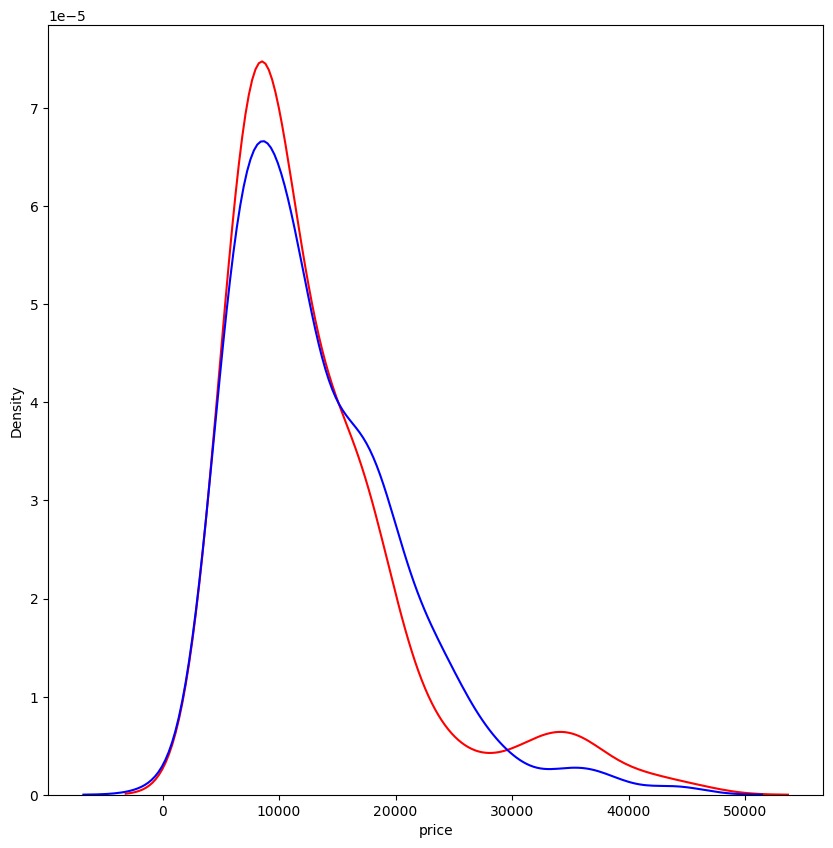

In [98]:
plt.figure(figsize=(10,10))
ax1=sns.distplot(df['price'],color='r',hist=False,label='actual price')
sns.distplot(yhat,hist=False,color='b',label='fitting data')



In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [100]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [101]:
z_pr=pr.fit_transform(z)
print(z.shape)
print(z_pr.shape)

(200, 4)
(200, 15)


In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [103]:
input=[('transform',StandardScaler()),('polynomial',PolynomialFeatures()),('modle',LinearRegression())]

In [104]:
pipe=Pipeline(input)

In [105]:
pipe.fit(z.astype(float),df['price'])

Pipeline(steps=[('transform', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('modle', LinearRegression())])

In [106]:
yhat=pipe.predict(z)
print(df['price'].values[0:5])
print(yhat[0:5])

[16500. 16500. 13950. 17450. 15250.]
[13095.64294486 18226.1683919  10389.2689322  16122.24836083
 13865.37475885]


In [107]:
x=df[['highway-mpg']]
y=df['price']
lm.fit(x,y)
print('R-squere= ',lm.score(x,y))

R-squere=  0.49718675257265277


In [108]:
from sklearn.metrics import mean_squared_error


In [109]:
yhat=lm.predict(x)
print(mean_squared_error(df['price'],yhat))

31755395.410812955


In [110]:
lm.fit(z,y)
print('R-squared= ',lm.score(z,y))

R-squared=  0.8094411114508352


In [111]:
yhat=lm.predict(z)
print('error= ',mean_squared_error(df['price'],yhat))

error=  12034831.790700044


In [112]:
from sklearn.metrics import r2_score

In [113]:
r2_score(df['price'],yhat)

0.8094411114508352

In [114]:
import numpy as np
x_in=np.arange(1,100,1).reshape(-1,1)


In [115]:
lm.fit(x,y)

LinearRegression()

In [116]:
yhat=lm.predict(x_in)
yhat[0:5]

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37647.80857347, 36824.98014144, 36002.15170941, 35179.32327737,
       34356.49484534])

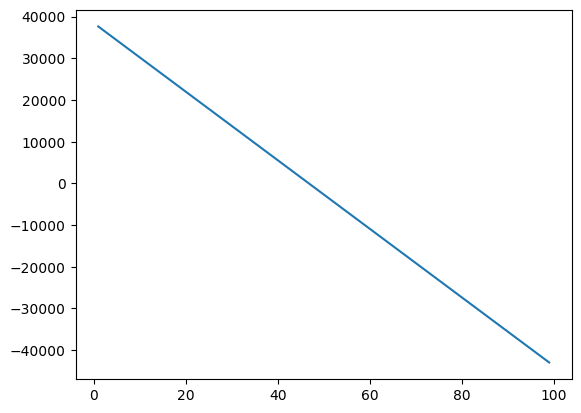

In [117]:
plt.plot(x_in, yhat)
plt.show()

In [118]:
y=df['price']
x=df.drop('price',axis=1)

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=1)

In [121]:
lm=LinearRegression()
lm.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [122]:
print(lm.score(x_train[['horsepower']],y_train))

0.6574888269176886


In [123]:
from sklearn.model_selection import cross_val_score , cross_val_predict

In [124]:
cross_val_score(lm,x_train[['horsepower']],y_train,cv=4).mean()

0.6250535250005314

In [125]:
yhat=cross_val_predict(lm,x_train[['horsepower']],y_train,cv=4)
print(yhat[0:5])

[12746.97291574  4040.85394434 25066.95259225  7490.44825376
  8640.31302357]


In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=0)

In [127]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [128]:
yhat_train=lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [129]:
yhat_test=lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [130]:
pr=PolynomialFeatures(degree=6)

In [131]:
x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])

In [132]:
lr.fit(x_train_pr,y_train)

LinearRegression()

In [133]:
yhat=lr.predict(x_test_pr)

In [134]:
print(yhat[0:5])
print(y_test[0:5].values)

[ 7070.19763768 10540.45273486 11141.85522935 18917.37564918
  6388.9707128 ]
[ 6575.  9988. 15580. 14399.  7775.]


In [135]:
lr.score(x_test_pr,y_test)

-1416.0197387269927

In [136]:
lr.score(x_train_pr,y_train)

0.7518135210141149

In [137]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [140]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [141]:
rg=Ridge(alpha=0.1)
rg.fit(x_train_pr,y_train)
yhat=rg.predict(x_test_pr)

/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.16167e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [142]:
print(yhat[0:5])
print(y_test[0:5].values)

[ 5931.6561495   9866.50182066 11577.25978533 24038.29061102
 13466.08518468]
[ 6575.  9988. 15580. 14399.  7775.]


In [150]:
par=[{'alpha':[0.001,0.01,1,10,100,1000,10000,100000]}]
grid=GridSearchCV(rg,par,cv=4)
grid.fit(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

GridSearchCV(cv=4, estimator=Ridge(alpha=0.1),
             param_grid=[{'alpha': [0.001, 0.01, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [151]:
grid.best_estimator_

Ridge(alpha=10000)

In [152]:
grid.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.7861104619380335